In [46]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\light\Desktop\data analysis\datasets\archive\disney_plus_titles.csv")

In [3]:
df_disney= data.copy()

### exploring the dataset

In [4]:
df_disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uniquely personal SparkShorts visions to the screen.
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a mysterious haunted mansion in this fur-raising flick.
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on an unforgettable journey.
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifying canine behavior and focuses on each animal’s needs.
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey Team!


In [5]:
df_disney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df_disney.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df_disney.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [9]:
df_disney.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


### cleaning and preprocessing

In [10]:
df_disney['show_id'].nunique()

1368

In [11]:
df_disney.shape

# so show_id columns is just like index for the dataset, so we can remove this column and instead we can use default index.

(1368, 12)

In [12]:
# creating checkpoint and removing unnecessary columns
df_disney1= df_disney.drop(columns= ['show_id', 'description'])
df_disney1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"


In [13]:
# dealing with date_added columns:
df_disney1['date_added']= pd.to_datetime(df_disney1['date_added'])

In [14]:
# checking the time delta b/w the dates
lst= []
for i in range(len(df_disney1['date_added'])):
    if i < len(df_disney1['date_added'])-1:
        i1 = i+1
        lst.append(pd.to_timedelta(df_disney1['date_added'][i1] - df_disney1['date_added'][i]))
    else:
        break

In [15]:
lst

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-2 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-2 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-2 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-2 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:0

In [16]:
# by looking the time delta, the gap b/w 'date_added' is very small, so we can fill these with ffill for our observation 

In [17]:
df_disney1['date_added'].fillna(method= 'ffill', inplace= True)

In [18]:
# filling other null values:
for i in df_disney1.columns:
    if i != 'rating':
        df_disney1[i] = df_disney1[i].fillna(value= 'not available')
    else:
        df_disney1[i] = df_disney1[i].fillna(value= 'not rated')

In [19]:
df_disney1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"


In [20]:
# making 'type' and 'rating' columns as category
df_disney1[['type', 'rating']]= df_disney1[['type', 'rating']].astype('category')

### interesting finding related to this dataset:

In [21]:
df_disney1.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"


In [22]:
# number of TV and movies: 
df_disney1['type'].value_counts()

Movie      991
TV Show    377
Name: type, dtype: int64

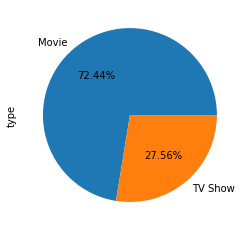

In [23]:
df_disney1['type'].value_counts().plot(kind= 'pie', autopct= '%.2f%%')
plt.show()

In [24]:
# number of TV and movies based on rating:
df_rating= df_disney1['rating'].value_counts()
df_rating

TV-G         307
TV-PG        275
G            235
PG           227
TV-Y7        130
TV-14         72
PG-13         60
TV-Y          48
TV-Y7-FV      12
not rated      2
Name: rating, dtype: int64

In [25]:
df_rating.values

array([307, 275, 235, 227, 130,  72,  60,  48,  12,   2], dtype=int64)

In [26]:
df_rating.index 

CategoricalIndex(['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13',
                  'TV-Y', 'TV-Y7-FV', 'not rated'],
                 categories=['G', 'PG', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', ...], ordered=False, dtype='category')

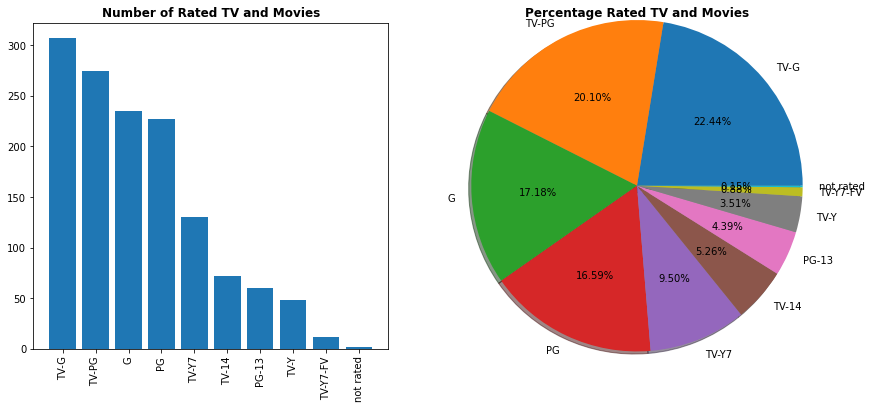

In [27]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (14, 6))


ax1.bar(df_rating.index, df_rating.values)
ax1.set_xticks(df_rating.index)
ax1.set_xticklabels(rotation= 90, labels= df_rating.index)
ax1.set_title('Number of Rated TV and Movies', weight= 'bold')

ax2.pie(df_rating.values, labels= df_rating.index, shadow= True, radius= 1.27, autopct= '%.2f%%')
ax2.set_title('Percentage Rated TV and Movies', weight= 'bold')

plt.show()

### although we should avoid pie chart, i am plotting this here just for the visualisation purpose, not to analysing anything

In [28]:
df_disney1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"


In [29]:
# top 10 release year when we got most content

df_disney1.groupby('release_year')['title'].count().sort_values(ascending= False).head(10)

release_year
2020    109
2019     97
2021     82
2017     67
2018     65
2016     60
2011     48
2014     47
2015     43
2012     39
Name: title, dtype: int64

In [30]:
# top 10 release year when we got least number of content:

df_disney1.groupby('release_year')['title'].count().sort_values().head(10)

release_year
1928    1
1968    1
1970    1
1945    1
1944    1
1982    2
1966    2
1967    2
1973    2
1943    2
Name: title, dtype: int64

In [31]:
# top 10 directors who gave most content

df_disney1.groupby('director')['title'].count().sort_values(ascending= False).head(10)

director
not available       440
Jack Hannah          17
John Lasseter        16
Paul Hoen            16
Robert Stevenson     12
Charles Nichols      12
Bob Peterson         10
Vincent McEveety     10
James Algar           9
Kenny Ortega          9
Name: title, dtype: int64

In [32]:
# top 10 directors who gave most content with type:

df_disney1.groupby(['director', 'type'])['title'].count().sort_values(ascending= False).head(10)

director          type   
not available     TV Show    377
                  Movie       63
Jack Hannah       Movie       17
John Lasseter     Movie       16
Paul Hoen         Movie       16
Robert Stevenson  Movie       12
Charles Nichols   Movie       12
Vincent McEveety  Movie       10
Bob Peterson      Movie       10
James Algar       Movie        9
Name: title, dtype: int64

In [33]:
# top 10 directors who gave least content

df_disney1.groupby('director')['title'].count().sort_values().head(10)

director
Aaron Blaise, Robert Walker    1
Michael Mayer                  1
Michael Lange                  1
Michael Grossman               1
Michael Gracey                 1
Michael Gottlieb               1
Michael Apted                  1
Maurice Joyce                  1
Matthew O'Callaghan            1
Matthew Diamond                1
Name: title, dtype: int64

In [34]:
df_disney1.groupby('country')['title'].count().sort_values(ascending= False).head(10)

country
United States                               976
not available                               175
United States, Canada                        28
United Kingdom                               23
United States, United Kingdom                19
Canada, United States                        17
United Kingdom, United States                14
United States, Australia                      7
Canada                                        5
United States, United Kingdom, Australia      4
Name: title, dtype: int64

### Most of content came from 'United States '

In [35]:
df_disney1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
5,TV Show,Star Wars: Visions,not available,not available,not available,2021-09-22,2021,TV-PG,1 Season,"Action-Adventure, Animation, Anime"
6,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goodman, John Lithgow, Kristin Scott Thomas",United States,2021-09-17,2009,PG,106 min,"Comedy, Romance, Romantic Comedy"
7,Movie,Descendants: Royal Wedding,Salvador Simó,"Dove Cameron, Sofia Carson, Booboo Stewart, Mitchell Hope, Sarah Jeffery, Melanie Paxson",not available,2021-09-17,2021,TV-G,22 min,"Animation, Fantasy, Musical"
8,Movie,Disney's Broadway Hits at London's Royal Albert Hall,Jay Hatcher,"John Barrowman, Ashley Brown, Merle Dandridge, Trevor Dion Nicholas, Jade Ewen, Alton Fitzgerald White",not available,2021-09-17,2016,TV-G,116 min,Concert Film
9,Movie,Flooded Tombs of the Nile,Katie Bauer Murdock,Devin E. Haqq,not available,2021-09-17,2021,TV-PG,44 min,Documentary


### checking for specific category:

#### list of unique category:

In [36]:
splitted= df_disney1['listed_in'].str.split(',')
unique= []
for row in splitted:
    for j in row:
        if j not in unique:
            unique.append(j)
        else:
            pass
        
unique= [unique[i].strip() for i in range(len(unique))]    
unique_genre= pd.Series(unique)    

unique_genre

0       Documentary
1            Comedy
2           Fantasy
3              Kids
4     Coming of Age
          ...      
62         Disaster
63        Superhero
64           Sports
65            Music
66           Travel
Length: 67, dtype: object

#### find all the records related to specific genre:

In [37]:
def matching(string, genre):
    lst= string.split(',')
    lst= [lst[i].strip() for i in range(len(lst))]
    if len(genre) == 1:
        if genre.title() in lst:
            return True
        else:
            return False
    else:
        if genre in lst:
            return True
        else:
            return False
        
    
def findings(Genre):
    return df_disney1[df_disney1['listed_in'].apply(lambda x : matching(x, Genre))] 
    

In [38]:
findings('Documentary')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
9,Movie,Flooded Tombs of the Nile,Katie Bauer Murdock,Devin E. Haqq,not available,2021-09-17,2021,TV-PG,44 min,Documentary
10,Movie,Jade Eyed Leopard,not available,Jeremy Irons,not available,2021-09-17,2020,TV-PG,44 min,"Animals & Nature, Documentary"
12,Movie,Smoky Mountain Park Rangers,not available,Peter Jessop,not available,2021-09-17,2021,TV-PG,42 min,Documentary
50,Movie,Killer Shark vs Killer Whale,not available,Edward Marcoux,not available,2021-08-06,2021,TV-14,44 min,"Animals & Nature, Documentary"
55,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,not available,2021-07-30,2021,TV-PG,88 min,Documentary
64,Movie,Playing with Sharks,not available,"Valerie Taylor, Dr. Sylvia Earle, Jeremiah Sullivan, Wendy Benchley, Jean Michel Cousteau, Michele Hall",not available,2021-07-23,2021,TV-14,91 min,"Animals & Nature, Biographical, Documentary"
65,Movie,Shark vs. Surfer,Phil Stebbing,Billy Lloyd,not available,2021-07-23,2020,TV-14,44 min,"Animals & Nature, Documentary"
66,Movie,Shark vs. Whale,not available,Ted Stewart,not available,2021-07-23,2020,TV-PG,44 min,"Animals & Nature, Documentary"
67,Movie,Stuntman,Kurt Mattila,Eddie Braun,not available,2021-07-23,2021,TV-14,87 min,Documentary


In [39]:
# record related to fantasy:

findings('fantasy') 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [40]:
# records related to Disaster
findings('Disaster')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
532,Movie,The Finest Hours,Craig Gillespie,"Chris Pine, Casey Affleck, Ben Foster, Holliday Grainger, John Ortiz, Kyle Gallner",United States,2020-03-06,2016,PG-13,119 min,"Action-Adventure, Disaster, Drama"
715,Movie,Chicken Little,Mark Dindal,"Zach Braff, Garry Marshall, Don Knotts, Patrick Stewart, Amy Sedaris, Steve Zahn",United States,2019-11-12,2005,G,84 min,"Animation, Comedy, Disaster"


In [41]:
# records related to Disaster:
findings('Superhero')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
535,Movie,Marvel Studios' Black Panther,Ryan Coogler,"Chadwick Boseman, Michael Jordan, Lupita Nyong'o, Danai Gurira, Martin Freeman, Daniel Kaluuya",United States,2020-03-04,2018,PG-13,137 min,"Action-Adventure, Science Fiction, Superhero"
593,Movie,Marvel Rising: Battle of The Bands,not available,"Dee Baker, Dove Cameron, Skai Jackson, Kathreen Khavari, Kamil McFadden, Tyler Posey",United States,2020-01-01,2019,TV-Y7,23 min,"Action-Adventure, Animation, Superhero"
619,Movie,Marvel Rising: Chasing Ghosts,not available,"Dee Baker, Chloe Bennet, Dove Cameron, Skai Jackson, Kathreen Khavari, Kamil McFadden",United States,2019-12-01,2019,TV-Y7-FV,24 min,"Action-Adventure, Animation, Superhero"
961,Movie,Marvel Studios: Assembling A Universe,not available,"Jeff McNeil, Meghan Leon, Jason Hillhouse, Robert Downey Jr., Clark Gregg, Jon Favreau",United States,2019-11-12,2014,TV-PG,43 min,"Action-Adventure, Documentary, Superhero"
964,Movie,Marvel Studios' Avengers: Age of Ultron,Joss Whedon,"Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans, Scarlett Johansson, Jeremy Renner",United States,2019-11-12,2015,PG-13,143 min,"Action-Adventure, Science Fiction, Superhero"
966,Movie,Marvel Studios' Captain America: Civil War,"Anthony Russo, Joe Russo","Chris Evans, Robert Downey Jr., Scarlett Johansson, Sebastian Stan, Anthony Mackie, Don Cheadle",United States,2019-11-12,2016,PG-13,150 min,"Action-Adventure, Science Fiction, Superhero"
967,Movie,Marvel Studios' Captain America: The First Avenger,Joe Johnston,"Chris Evans, Tommy Jones, Hugo Weaving, Hayley Atwell, Sebastian Stan, Dominic Cooper",United States,2019-11-12,2011,PG-13,126 min,"Action-Adventure, Science Fiction, Superhero"
968,Movie,Marvel Studios' Captain America: The Winter Soldier,"Anthony Russo, Joe Russo","Chris Evans, Scarlett Johansson, Sebastian Stan, Anthony Mackie, Cobie Smulders, Frank Grillo",United States,2019-11-12,2014,PG-13,138 min,"Action-Adventure, Science Fiction, Superhero"
969,Movie,Marvel Studios' Captain Marvel,"Anna Boden, Ryan Fleck","Brie Larson, Samuel Jackson, Ben Mendelsohn, Djimon Hounsou, Lee Pace, Lashana Lynch","United States, Australia",2019-11-12,2019,PG-13,126 min,"Action-Adventure, Science Fiction, Superhero"
970,Movie,Marvel Studios' Doctor Strange,Scott Derrickson,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel McAdams, Benedict Wong, Michael Stuhlbarg, Benjamin Bratt",United States,2019-11-12,2016,PG-13,116 min,"Action-Adventure, Fantasy, Superhero"


In [42]:
# records related to Coming of Age:

findings('Coming of Age')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
20,TV Show,"Doogie Kamealoha, M.D.",not available,"Peyton Elizabeth Lee, Emma Meisel, Matthew Sato, Wes Tian, Jeffrey Bowyer-Chapman, Mapuana Makia",United States,2021-09-08,2021,TV-PG,1 Season,"Comedy, Coming of Age, Family"
22,TV Show,Pepper Ann,not available,"Kathleen Wilhoite, Clea Lewis, Danny Cooksey, Pamela Segall, April Winchell, Don Adams",United States,2021-09-08,1997,TV-Y,3 Seasons,"Animation, Comedy, Coming of Age"
40,Movie,Aquamarine,Elizabeth Allen Rosenbaum,"Jake McDorman, Arielle Kebbel, Claudia Karvan, Bruce Spence, Tammin Sursok, Roy Billing",United States,2021-08-13,2006,PG,104 min,"Comedy, Coming of Age, Fantasy"
49,Movie,Beverly Hills Chihuahua 3: Viva La Fiesta!,Lev L. Spiro,"George Lopez, Odette Annable, Ernie Hudson, Miguel Ferrer, Kay Panabaker, Tom Kenny",United States,2021-08-06,2012,G,92 min,"Comedy, Coming of Age, Family"
83,TV Show,So Random!,not available,"Tiffany Thornton, Sterling Knight, Brandon Mychal Smith, Doug Brochu, Allisyn Ashley Arm",United States,2021-07-14,2011,TV-G,1 Season,"Comedy, Coming of Age"
84,Movie,Flicka,Michael Mayer,"Alison Lohman, Tim McGraw, Maria Bello, Ryan Kwanten, Danny Pino, Dallas Roberts","United States, United Kingdom",2021-07-09,2006,PG,95 min,"Animals & Nature, Coming of Age, Drama"
97,Movie,The Sandlot,David Mickey Evans,"Art La Fleur, Tom Guiry, Mike Vitar, Patrick Renna, Chauncey Leopardi, Marty York",United States,2021-07-02,1993,PG,101 min,"Comedy, Coming of Age, Family"
99,Movie,Adventures in Babysitting,Chris Columbus,"Elisabeth Shue, Maia Brewton, Keith Coogan, Anthony Rapp, Calvin Levels, Vincent Phillip D'Onofrio",United States,2021-06-25,1987,TV-PG,102 min,"Action-Adventure, Comedy, Coming of Age"
107,Movie,Luca,Enrico Casarosa,"Jacob Tremblay, Jack Dylan Grazer, Emma Berman, Maya Rudolph, Marco Barricelli, Jim Gaffigan",United States,2021-06-18,2021,PG,101 min,"Animation, Buddy, Coming of Age"


In [43]:
# records related to Animals & Nature:

findings('Animals & Nature')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
10,Movie,Jade Eyed Leopard,not available,Jeremy Irons,not available,2021-09-17,2020,TV-PG,44 min,"Animals & Nature, Documentary"
13,TV Show,Life Below Zero,not available,"Chip Hailstone, Agnes Hailstone, Sue Aikens, Andy Bassich",United States,2021-09-15,2012,TV-14,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
16,TV Show,Unknown Waters with Jeremy Wade,not available,Jeremy Wade,not available,2021-09-15,2021,TV-14,1 Season,"Animals & Nature, Docuseries"
23,TV Show,The Incredible Dr. Pol,not available,"Rick Robles, Dr. Pol",United States,2021-09-08,2011,TV-14,19 Seasons,"Animals & Nature, Docuseries, Family"
27,TV Show,Alaska Animal Rescue,not available,Victoria Vosburg,United States,2021-09-01,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
34,TV Show,Dr. K's Exotic Animal ER,not available,"Dr. Susan Kelleher, Art Edmonds",not available,2021-08-25,2014,TV-14,9 Seasons,"Animals & Nature, Docuseries, Family"
36,TV Show,Life Below Zero: Next Generation,not available,Mocean Melvin,United States,2021-08-25,2020,TV-14,2 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
38,TV Show,"Dr. Oakley, Yukon Vet",not available,"Dr. Michelle Oakley, Zachary Fine",United States,2021-08-18,2013,TV-PG,9 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
39,TV Show,Growing Up Animal,not available,Tracee Ellis Ross,not available,2021-08-18,2021,TV-PG,1 Season,"Animals & Nature, Docuseries, Family"


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"


### Finding the details related to specific keyword:

#### titles related to spider-man

In [88]:
match= df_disney1['title'].apply(lambda x: re.findall(pattern= r'Spid', string= x))

match_index= [i for i in range(len(match)) if len(match[i])>0]

df_disney1.iloc[match_index, :]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
72,TV Show,Meet Spidey and His Amazing Friends (Shorts),not available,"Ben Valic, Melanie Minichino",not available,2021-07-21,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
150,TV Show,Spider-Man,not available,"Christopher Daniel Barnes, Edward Asner, Linda Gray, Rodney Saulsberry, Liz Georges, Saratoga Ballantine",United States,2021-05-03,1994,TV-Y7,5 Seasons,"Action-Adventure, Animation, Kids"
979,TV Show,Marvel Ultimate Spider-Man,not available,"Drake Bell, Chi McBride, Steven Weber, J.K. Simmons, Tom Kenny, Clark Gregg",United States,2019-11-12,2011,TV-Y7,4 Seasons,"Action-Adventure, Animation, Fantasy"
1130,TV Show,Spider-Man (Shorts),not available,not available,not available,2019-11-12,2016,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
1131,TV Show,Spider-Man and His Amazing Friends,not available,"Hans Conried, Jerry Dexter, George DiCenzo, Alan Dinehart, Walker Edminston, Michael Evans",United States,2019-11-12,1982,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
1132,TV Show,Spider-Man Unlimited,not available,"Rino Romano, Kathleen Barr, Jim Byrnes, Garry Chalk, Paul Dobson","United States, Canada",2019-11-12,1999,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
1133,TV Show,Spider-Woman,not available,"Joan Ark, Bruce Miller, Bryan Scott, Lou Krugman, Dick Tufeld",United States,2019-11-12,1979,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"


#### titles related to Iron Man 

In [90]:
match= df_disney1['title'].apply(lambda x: re.findall(pattern= r'Iron', string= x))

match_index= [i for i in range(len(match)) if len(match[i])>0]

df_disney1.iloc[match_index, :]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
309,Movie,Marvel's Iron Man & Captain America: Heroes United,Leo Riley,"Adrian Pasdar, Roger Smith, Fred Tatasciore, David Kaye, Liam O'Brien, Clancy Brown",United States,2020-10-16,2014,PG,72 min,"Action-Adventure, Animation, Science Fiction"
545,Movie,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,"Adrian Pasdar, Fred Tatasciore, David Kaye, Dee Baker, Robin Downes",United States,2020-02-16,2013,PG,74 min,"Action-Adventure, Animation, Science Fiction"
620,Movie,Marvel Rising: Heart of Iron,not available,"Dee Baker, Chloe Bennet, Dove Cameron, Robbie Daymond, Kathreen Khavari, Daisy Lightfoot",United States,2019-12-01,2019,TV-Y7,46 min,"Action-Adventure, Animation, Coming of Age"
894,TV Show,Iron Man (Series),not available,"Robert Hays, James Avery, Ed Gilbert, Jim Cummings, Tony Steedman, James Warwick",United States,2019-11-12,1994,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
895,TV Show,Iron Man Armored Adventures,not available,"Adrian Petriw, Daniel Bacon, Anna Cummer, Mackenzie Gray, Vincent Tong","Canada, United States, United Kingdom, France, Luxembourg",2019-11-12,2008,TV-G,2 Seasons,"Action-Adventure, Animation, Coming of Age"
896,Movie,Iron Will,Charles Haid,"Mackenzie Astin, Kevin Spacey, David Ogden Stiers, August Schellenberg, Brian Cox, George Gerdes",United States,2019-11-12,1994,PG,109 min,"Action-Adventure, Coming of Age, Family"
973,Movie,Marvel Studios' Iron Man,Jon Favreau,"Robert Downey Jr., Terrence Howard, Jeff Bridges, Gwyneth Paltrow, Leslie Bibb, Shaun Toub","United States, Canada",2019-11-12,2008,PG-13,127 min,"Action-Adventure, Science Fiction, Superhero"
974,Movie,Marvel Studios' Iron Man 2,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadle, Scarlett Johansson, Sam Rockwell, Clark Gregg",United States,2019-11-12,2010,PG-13,125 min,"Action-Adventure, Science Fiction, Superhero"
975,Movie,Marvel Studios' Iron Man 3,Shane Black,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadle, Guy Pearce, Rebecca Hall, Stephanie Szostak",United States,2019-11-12,2013,PG-13,132 min,"Action-Adventure, Science Fiction, Superhero"


#### results related to both spider man and iron man

In [93]:
match= df_disney1['title'].apply(lambda x: re.findall(pattern= r'Iron|Spid', string= x))

match_index= [i for i in range(len(match)) if len(match[i])>0]

df_disney1.iloc[match_index, :]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
72,TV Show,Meet Spidey and His Amazing Friends (Shorts),not available,"Ben Valic, Melanie Minichino",not available,2021-07-21,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
150,TV Show,Spider-Man,not available,"Christopher Daniel Barnes, Edward Asner, Linda Gray, Rodney Saulsberry, Liz Georges, Saratoga Ballantine",United States,2021-05-03,1994,TV-Y7,5 Seasons,"Action-Adventure, Animation, Kids"
309,Movie,Marvel's Iron Man & Captain America: Heroes United,Leo Riley,"Adrian Pasdar, Roger Smith, Fred Tatasciore, David Kaye, Liam O'Brien, Clancy Brown",United States,2020-10-16,2014,PG,72 min,"Action-Adventure, Animation, Science Fiction"
545,Movie,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,"Adrian Pasdar, Fred Tatasciore, David Kaye, Dee Baker, Robin Downes",United States,2020-02-16,2013,PG,74 min,"Action-Adventure, Animation, Science Fiction"
620,Movie,Marvel Rising: Heart of Iron,not available,"Dee Baker, Chloe Bennet, Dove Cameron, Robbie Daymond, Kathreen Khavari, Daisy Lightfoot",United States,2019-12-01,2019,TV-Y7,46 min,"Action-Adventure, Animation, Coming of Age"
894,TV Show,Iron Man (Series),not available,"Robert Hays, James Avery, Ed Gilbert, Jim Cummings, Tony Steedman, James Warwick",United States,2019-11-12,1994,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
895,TV Show,Iron Man Armored Adventures,not available,"Adrian Petriw, Daniel Bacon, Anna Cummer, Mackenzie Gray, Vincent Tong","Canada, United States, United Kingdom, France, Luxembourg",2019-11-12,2008,TV-G,2 Seasons,"Action-Adventure, Animation, Coming of Age"
896,Movie,Iron Will,Charles Haid,"Mackenzie Astin, Kevin Spacey, David Ogden Stiers, August Schellenberg, Brian Cox, George Gerdes",United States,2019-11-12,1994,PG,109 min,"Action-Adventure, Coming of Age, Family"
973,Movie,Marvel Studios' Iron Man,Jon Favreau,"Robert Downey Jr., Terrence Howard, Jeff Bridges, Gwyneth Paltrow, Leslie Bibb, Shaun Toub","United States, Canada",2019-11-12,2008,PG-13,127 min,"Action-Adventure, Science Fiction, Superhero"


#### finding the movie or tv shows starred 'Tom Hanks'

In [98]:
match= df_disney1['cast'].apply(lambda x: re.findall(pattern= r'Tom Hanks', string= x))

match_index= [i for i in range(len(match)) if len(match[i])>0]

df_disney1.iloc[match_index, :]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
236,Movie,Toy Story: That Time Forgot,Steve Purcell,"Tom Hanks, Tim Allen, Kristen Schaal, Kevin McKidd, Emily Hahn, Wallace Shawn",United States,2021-01-08,2014,TV-G,22 min,"Action-Adventure, Animation, Comedy"
304,Movie,Toy Story of Terror!,Angus MacLane,"Tom Hanks, Tim Allen, Joan Cusack, Carl Weathers, Stephen Tobolowsky, Timothy Dalton",United States,2020-10-23,2013,TV-G,22 min,"Animation, Comedy, Family"
549,Movie,Splash,Ron Howard,"Tom Hanks, Daryl Hannah, Eugene Levy, John Candy, Dody Goodman, Shecky Greene",United States,2020-02-14,1984,TV-PG,110 min,"Comedy, Fantasy, Romance"
552,Movie,Toy Story 4,Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, Keegan-Michael Key, Madeleine McGraw",United States,2020-02-05,2019,G,101 min,"Action-Adventure, Animation, Comedy"
1105,Movie,Saving Mr. Banks,John Hancock,"Emma Thompson, Tom Hanks, Colin Farrell, Paul Giamatti, Jason Schwartzman, Bradley Whitford","United States, United Kingdom, Australia",2019-11-12,2013,PG-13,129 min,"Biographical, Drama, Historical"
1303,Movie,Toy Story,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger",United States,2019-11-12,1995,G,83 min,"Action-Adventure, Animation, Buddy"
1304,Movie,Toy Story 2,John Lasseter,"Tom Hanks, Tim Allen, Joan Cusack, Kelsey Grammer, Don Rickles, Jim Varney",United States,2019-11-12,1999,G,93 min,"Action-Adventure, Animation, Comedy"
1305,Movie,Toy Story 3,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Don Rickles, Wallace Shawn, John Ratzenberger",United States,2019-11-12,2010,G,103 min,"Animation, Comedy, Drama"
1306,Movie,Toy Story Toons: Hawaiian Vacation,Gary Rydstrom,"Tom Hanks, Tim Allen, Joan Cusack, Kristen Schaal, Wallace Shawn, Axel Geddes",United States,2019-11-12,2011,G,6 min,"Animation, Comedy, Family"
1307,Movie,Toy Story Toons: Partysaurus Rex,Mark Walsh,"Tom Hanks, Tim Allen, Wallace Shawn, Corey Burton, Tony Cox, Don Fullilove",United States,2019-11-12,2012,G,9 min,"Animation, Comedy, Family"


### finding the yearwise result:

In [110]:
# total years
total_year= df_disney1['date_added'].dt.year
total_year.unique()

array([2021, 2020, 2019], dtype=int64)

In [113]:
# checking the year wise result:

total_year_record= df_disney1.groupby(total_year)['title'].count()
total_year_record

# most of the data is available for year 2019

date_added
2019    768
2020    358
2021    242
Name: title, dtype: int64

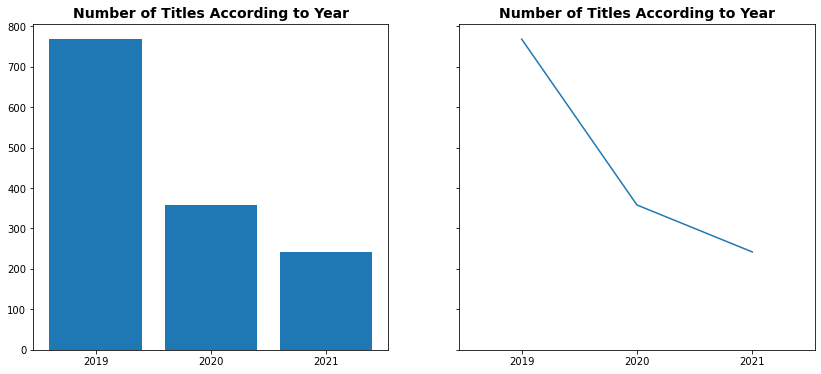

In [149]:
# comparing the result through plot:

fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (14, 6), sharey= True, sharex= True)

ax1.bar(x= total_year_record.index, height= total_year_record.values)
ax1.set_xticks(total_year_record.index)
ax1.set_xticklabels(total_year_record.index)
ax1.set_title(label= 'Number of Titles According to Year', size= 14, weight= 'bold')

ax2.plot(total_year_record.index, total_year_record.values)
ax2.set_xticks(total_year_record.index)
ax2.set_xticklabels(total_year_record.index)
ax2.set_title(label= 'Number of Titles According to Year', size= 14, weight= 'bold')

plt.show()

In [161]:
# further dividing the results by TV and Movies
# adding the year column
df_disney1.insert(loc= 6, column= 'date_added(year)', value= df_disney1['date_added'].dt.year)

In [163]:
df_disney1.groupby(['date_added(year)', 'type'])['title'].count()

date_added(year)  type   
2019              Movie      630
                  TV Show    138
2020              Movie      230
                  TV Show    128
2021              Movie      131
                  TV Show    111
Name: title, dtype: int64

<AxesSubplot:xlabel='date_added(year),type'>

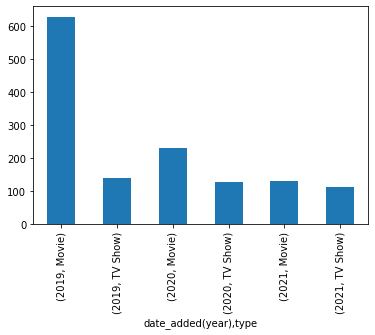

In [169]:
df_disney1.groupby(['date_added(year)', 'type'])['title'].count().plot(kind= 'bar')

#### Finding the result related to duration column:

In [206]:
# Tv show which are available by seasons:

seasons= df_disney1['duration'].apply(lambda x : re.findall(pattern= r'Season', string= x))
seasons_index= [i for i in range(len(seasons)) if len(seasons[i]) > 0]
df_seasons= df_disney1.iloc[seasons_index, :]
df_seasons

,type,title,director,cast,country,date_added,date_added(year),release_year,rating,duration,listed_in
3,TV Show,Dog: Impossible,not available,Matt Beisner,United States,2021-09-22,2021,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,not available,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser, Dee Bradley Baker, Melanie Minichino",United States,2021-09-22,2021,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids"
5,TV Show,Star Wars: Visions,not available,not available,not available,2021-09-22,2021,2021,TV-PG,1 Season,"Action-Adventure, Animation, Anime"
13,TV Show,Life Below Zero,not available,"Chip Hailstone, Agnes Hailstone, Sue Aikens, Andy Bassich",United States,2021-09-15,2021,2012,TV-14,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
14,TV Show,Miraculous: Tales Of Ladybug & Cat Noir,not available,"Cristina Vee, Bryce Papenbrook, Keith Silverstein, Mela Lee, Max Mittelman, Carrie Keranen","France, South Korea, Japan, United States",2021-09-15,2021,2015,TV-Y7,1 Season,"Action-Adventure, Animation, Fantasy"
15,TV Show,Ready for Preschool,not available,not available,not available,2021-09-15,2021,2019,TV-Y,1 Season,"Kids, Music"
16,TV Show,Unknown Waters with Jeremy Wade,not available,Jeremy Wade,not available,2021-09-15,2021,2021,TV-14,1 Season,"Animals & Nature, Docuseries"
20,TV Show,"Doogie Kamealoha, M.D.",not available,"Peyton Elizabeth Lee, Emma Meisel, Matthew Sato, Wes Tian, Jeffrey Bowyer-Chapman, Mapuana Makia",United States,2021-09-08,2021,2021,TV-PG,1 Season,"Comedy, Coming of Age, Family"
21,TV Show,"Mira, Royal Detective",not available,"Leela Ladnier, Utkarsh Ambudkar, Roshni Edwards, Kal Penn, Kamran Lucas",United States,2021-09-08,2021,2020,TV-Y,2 Seasons,"Animation, Fantasy, Kids"
22,TV Show,Pepper Ann,not available,"Kathleen Wilhoite, Clea Lewis, Danny Cooksey, Pamela Segall, April Winchell, Don Adams",United States,2021-09-08,2021,1997,TV-Y,3 Seasons,"Animation, Comedy, Coming of Age"


In [203]:
# checking how many shows have how many seasons
df_seasons.groupby('duration')['title'].count()

duration
1 Season      204
10 Seasons      1
16 Seasons      1
19 Seasons      1
2 Seasons      80
3 Seasons      43
31 Seasons      1
4 Seasons      24
5 Seasons       9
6 Seasons       3
7 Seasons       5
8 Seasons       2
9 Seasons       3
Name: title, dtype: int64

In [205]:
# tv shows or movies which have only single season

# Tv show which are available by seasons:

seasons_single= df_disney1['duration'].apply(lambda x : re.findall(pattern= r'Season', string= x))
seasons_index_single= [i for i in range(len(seasons)) if len(seasons[i]) == 0]
df_seasons_single= df_disney1.iloc[seasons_index, :]
df_seasons_single

,type,title,director,cast,country,date_added,date_added(year),release_year,rating,duration,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",not available,2021-09-24,2021,2021,TV-PG,88 min,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mass Carroll, Max Charles, Tim Conway, Jennifer Elise Cox","United States, Canada",2021-09-24,2021,2011,G,93 min,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sam Trammell, Nat Wolff, Willem Dafoe",United States,2021-09-24,2021,2014,PG-13,127 min,"Coming of Age, Drama, Romance"
6,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goodman, John Lithgow, Kristin Scott Thomas",United States,2021-09-17,2021,2009,PG,106 min,"Comedy, Romance, Romantic Comedy"
7,Movie,Descendants: Royal Wedding,Salvador Simó,"Dove Cameron, Sofia Carson, Booboo Stewart, Mitchell Hope, Sarah Jeffery, Melanie Paxson",not available,2021-09-17,2021,2021,TV-G,22 min,"Animation, Fantasy, Musical"
8,Movie,Disney's Broadway Hits at London's Royal Albert Hall,Jay Hatcher,"John Barrowman, Ashley Brown, Merle Dandridge, Trevor Dion Nicholas, Jade Ewen, Alton Fitzgerald White",not available,2021-09-17,2021,2016,TV-G,116 min,Concert Film
9,Movie,Flooded Tombs of the Nile,Katie Bauer Murdock,Devin E. Haqq,not available,2021-09-17,2021,2021,TV-PG,44 min,Documentary
10,Movie,Jade Eyed Leopard,not available,Jeremy Irons,not available,2021-09-17,2021,2020,TV-PG,44 min,"Animals & Nature, Documentary"
11,Movie,Nona,Louis Gonzales,not available,not available,2021-09-17,2021,2021,G,9 min,"Animation, Comedy, Family"
12,Movie,Smoky Mountain Park Rangers,not available,Peter Jessop,not available,2021-09-17,2021,2021,TV-PG,42 min,Documentary


In [207]:
# checking how many movies and TV shows have single season

df_seasons_single.groupby('type')['duration'].count()

# so the contains only movies

type
Movie      991
TV Show      0
Name: duration, dtype: int64

In [210]:
#  movies or tv shows related to united state only
df_disney1[df_disney1['country'] == 'United States'].groupby(['type', 'country'])['title'].count()

type     country      
Movie    United States    752
TV Show  United States    224
Name: title, dtype: int64